In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_csv("/content/Crop_recommendation 2.csv")
print("Data shape:", data.shape)
data.head()


Data shape: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


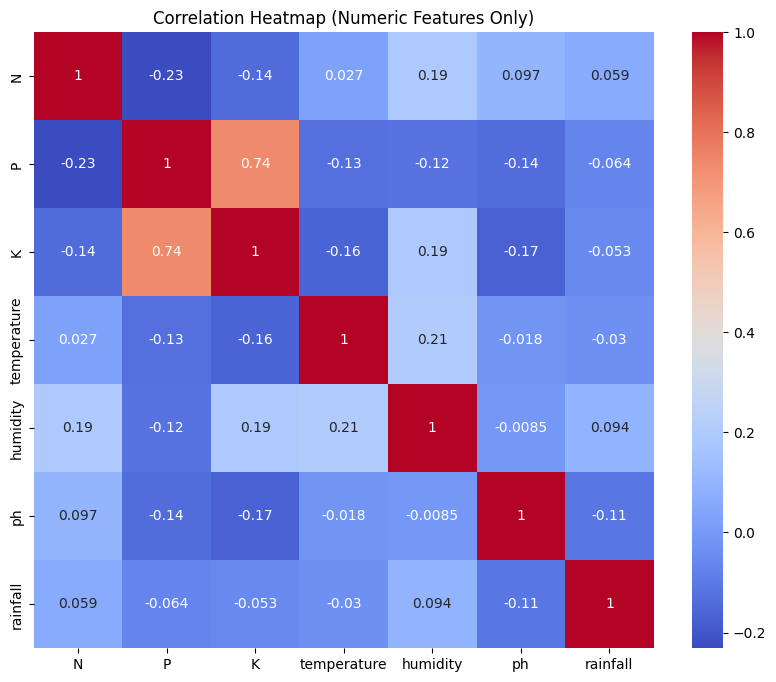

In [4]:

numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

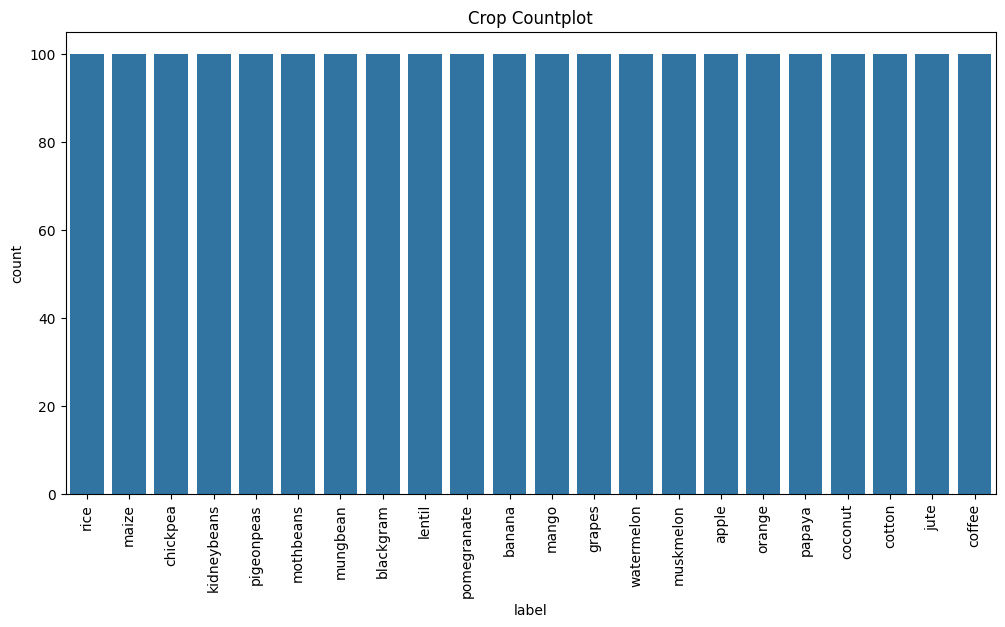

In [5]:

plt.figure(figsize=(12,6))
sns.countplot(x='label', data=data)
plt.title("Crop Countplot")
plt.xticks(rotation=90)
plt.show()


In [6]:

X = data.drop("label", axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [7]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:

y_pred = rf_classifier.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 99.39%
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       1.00      0.97      0.98        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        30
        jute       0.94      1.00      0.97        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.97      0.98        30
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.97      1.00      0.98        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1

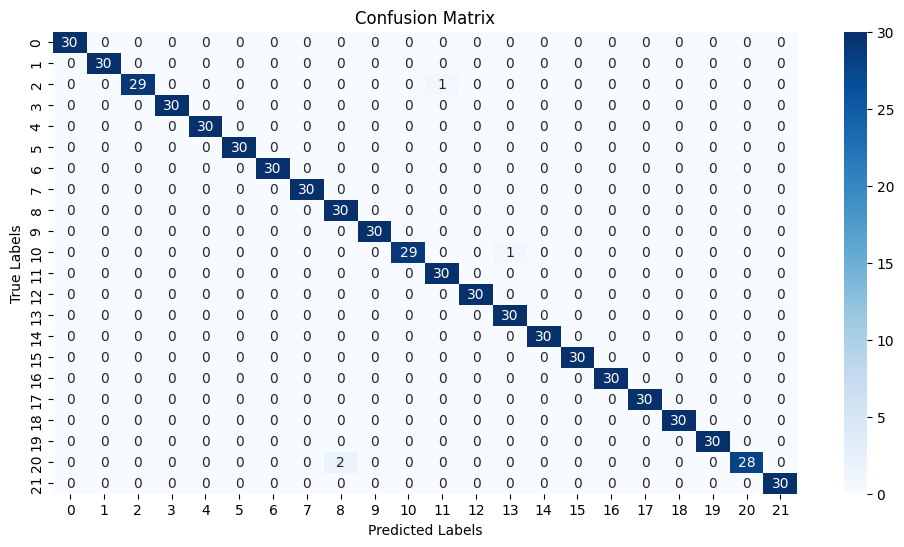

In [9]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


       Feature  Importance
6     rainfall    0.225824
4     humidity    0.213526
2            K    0.170647
1            P    0.153043
0            N    0.108487
3  temperature    0.076468
5           ph    0.052006


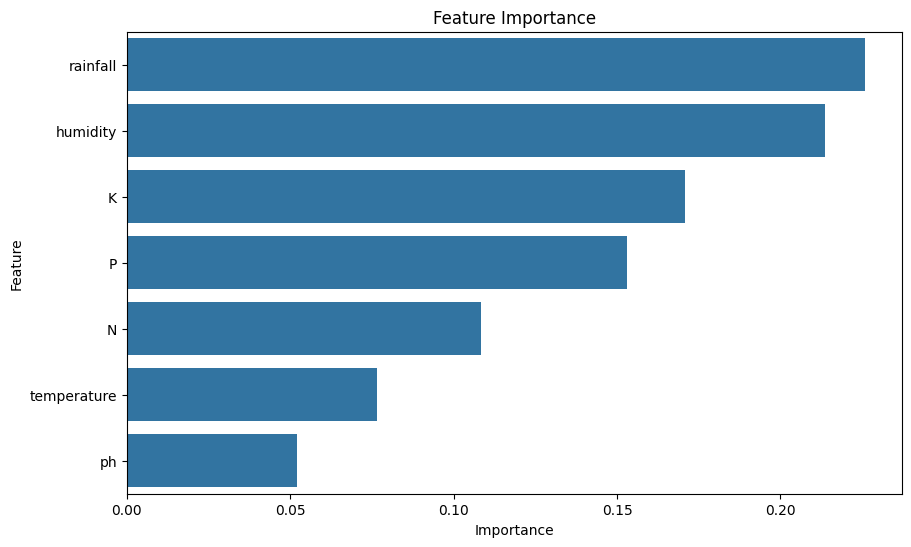

In [10]:

importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)
print(importance_df)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()


In [13]:

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):

    input_features = pd.DataFrame(
        [[N, P, K, temperature, humidity, ph, rainfall]],
        columns=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
    )
    prediction = rf_classifier.predict(input_features)
    return prediction[0]

# Ví dụ sử dụng hàm dự đoán:
sample_input = [80, 43, 43, 23, 74, 6, 170]  # Thông số mẫu
predicted_crop = predict_crop(*sample_input)
print("Predicted Crop:", predicted_crop)


Predicted Crop: jute
